In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### 1. Load Data

In [2]:
ratings = pd.read_csv('data/raw/u.data', sep='\t', 
                      names=['user_id', 'item_id', 'rating', 'timestamp'],
                      engine='python')

genre_cols = ['unknown', 'Action', 'Adventure', 'Animation', 'Children', 
              'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 
              'Sci-Fi', 'Thriller', 'War', 'Western']

movies = pd.read_csv('data/raw/u.item', sep='|', encoding='latin-1',
                     names=['movie_id', 'title', 'release_date', 'video_release_date', 
                            'imdb_url'] + genre_cols,
                     engine='python')

print(f"✓ Loaded {len(ratings):,} ratings")
print(f"✓ Loaded {len(movies):,} movies")

✓ Loaded 100,000 ratings
✓ Loaded 1,682 movies


### 2. Basic

In [3]:
print(f"Number of users: {ratings['user_id'].nunique():,}")
print(f"Number of movies: {ratings['item_id'].nunique():,}")
print(f"Number of ratings: {len(ratings):,}")
print(f"Rating scale: {ratings['rating'].min()} to {ratings['rating'].max()}")
print(f"Average rating: {ratings['rating'].mean():.2f}")
print(f"Median rating: {ratings['rating'].median():.1f}")

# Data sparsity
n_users = ratings['user_id'].nunique()
n_items = ratings['item_id'].nunique()
sparsity = 1 - (len(ratings) / (n_users * n_items))
print(f"Matrix sparsity: {sparsity*100:.2f}%")

Number of users: 943
Number of movies: 1,682
Number of ratings: 100,000
Rating scale: 1 to 5
Average rating: 3.53
Median rating: 4.0
Matrix sparsity: 93.70%


### 3. Rating Distribution

In [4]:
rating_counts = ratings['rating'].value_counts().sort_index()
print("\nRating counts:")
for rating, count in rating_counts.items():
    print(f"  {rating} stars: {count:,} ({count/len(ratings)*100:.1f}%)")


Rating counts:
  1 stars: 6,110 (6.1%)
  2 stars: 11,370 (11.4%)
  3 stars: 27,145 (27.1%)
  4 stars: 34,174 (34.2%)
  5 stars: 21,201 (21.2%)


### 4. User Activity Analysis

In [5]:
user_activity = ratings.groupby('user_id').size()
print(f"Average ratings per user: {user_activity.mean():.1f}")
print(f"Median ratings per user: {user_activity.median():.0f}")
print(f"Min ratings per user: {user_activity.min()}")
print(f"Max ratings per user: {user_activity.max()}")

Average ratings per user: 106.0
Median ratings per user: 65
Min ratings per user: 20
Max ratings per user: 737


### 5. Most Popular Analysis

In [6]:
movie_stats = ratings.groupby('item_id').agg({
    'rating': ['count', 'mean']
}).reset_index()
movie_stats.columns = ['movie_id', 'rating_count', 'avg_rating']
movie_stats = movie_stats.merge(movies[['movie_id', 'title']], on='movie_id')

print("\nTop 10 Most Rated Movies:")
top_rated = movie_stats.nlargest(10, 'rating_count')
for idx, row in top_rated.iterrows():
    print(f"  {row['title'][:50]:50} - {row['rating_count']:4} ratings (avg: {row['avg_rating']:.2f})")

print("\nTop 10 Highest Rated Movies (min 50 ratings):")
top_quality = movie_stats[movie_stats['rating_count'] >= 50].nlargest(10, 'avg_rating')
for idx, row in top_quality.iterrows():
    print(f"  {row['title'][:50]:50} - {row['avg_rating']:.2f} (n={row['rating_count']})")



Top 10 Most Rated Movies:
  Star Wars (1977)                                   -  583 ratings (avg: 4.36)
  Contact (1997)                                     -  509 ratings (avg: 3.80)
  Fargo (1996)                                       -  508 ratings (avg: 4.16)
  Return of the Jedi (1983)                          -  507 ratings (avg: 4.01)
  Liar Liar (1997)                                   -  485 ratings (avg: 3.16)
  English Patient, The (1996)                        -  481 ratings (avg: 3.66)
  Scream (1996)                                      -  478 ratings (avg: 3.44)
  Toy Story (1995)                                   -  452 ratings (avg: 3.88)
  Air Force One (1997)                               -  431 ratings (avg: 3.63)
  Independence Day (ID4) (1996)                      -  429 ratings (avg: 3.44)

Top 10 Highest Rated Movies (min 50 ratings):
  Close Shave, A (1995)                              - 4.49 (n=112)
  Schindler's List (1993)                            - 4.4

### 6. Genre Analysis

In [7]:
genre_counts = movies[genre_cols].sum().sort_values(ascending=False)
print("\nMovies per genre:")
for genre, count in genre_counts.items():
    print(f"  {genre:15} - {int(count):4} movies")


Movies per genre:
  Drama           -  725 movies
  Comedy          -  505 movies
  Action          -  251 movies
  Thriller        -  251 movies
  Romance         -  247 movies
  Adventure       -  135 movies
  Children        -  122 movies
  Crime           -  109 movies
  Sci-Fi          -  101 movies
  Horror          -   92 movies
  War             -   71 movies
  Mystery         -   61 movies
  Musical         -   56 movies
  Documentary     -   50 movies
  Animation       -   42 movies
  Western         -   27 movies
  Film-Noir       -   24 movies
  Fantasy         -   22 movies
  unknown         -    2 movies


### 7. Temporal Analysis

In [8]:
ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['datetime'].dt.year
ratings['month'] = ratings['datetime'].dt.month

print(f"Rating period: {ratings['datetime'].min()} to {ratings['datetime'].max()}")

yearly_counts = ratings['year'].value_counts().sort_index()
print("\nRatings per year:")
for year, count in yearly_counts.items():
    print(f"  {year}: {count:,} ratings")


Rating period: 1997-09-20 03:05:10 to 1998-04-22 23:10:38

Ratings per year:
  1997: 52,899 ratings
  1998: 47,101 ratings


### 8. Visualizations

✓ Saved visualization to 'eda_visualization.png'


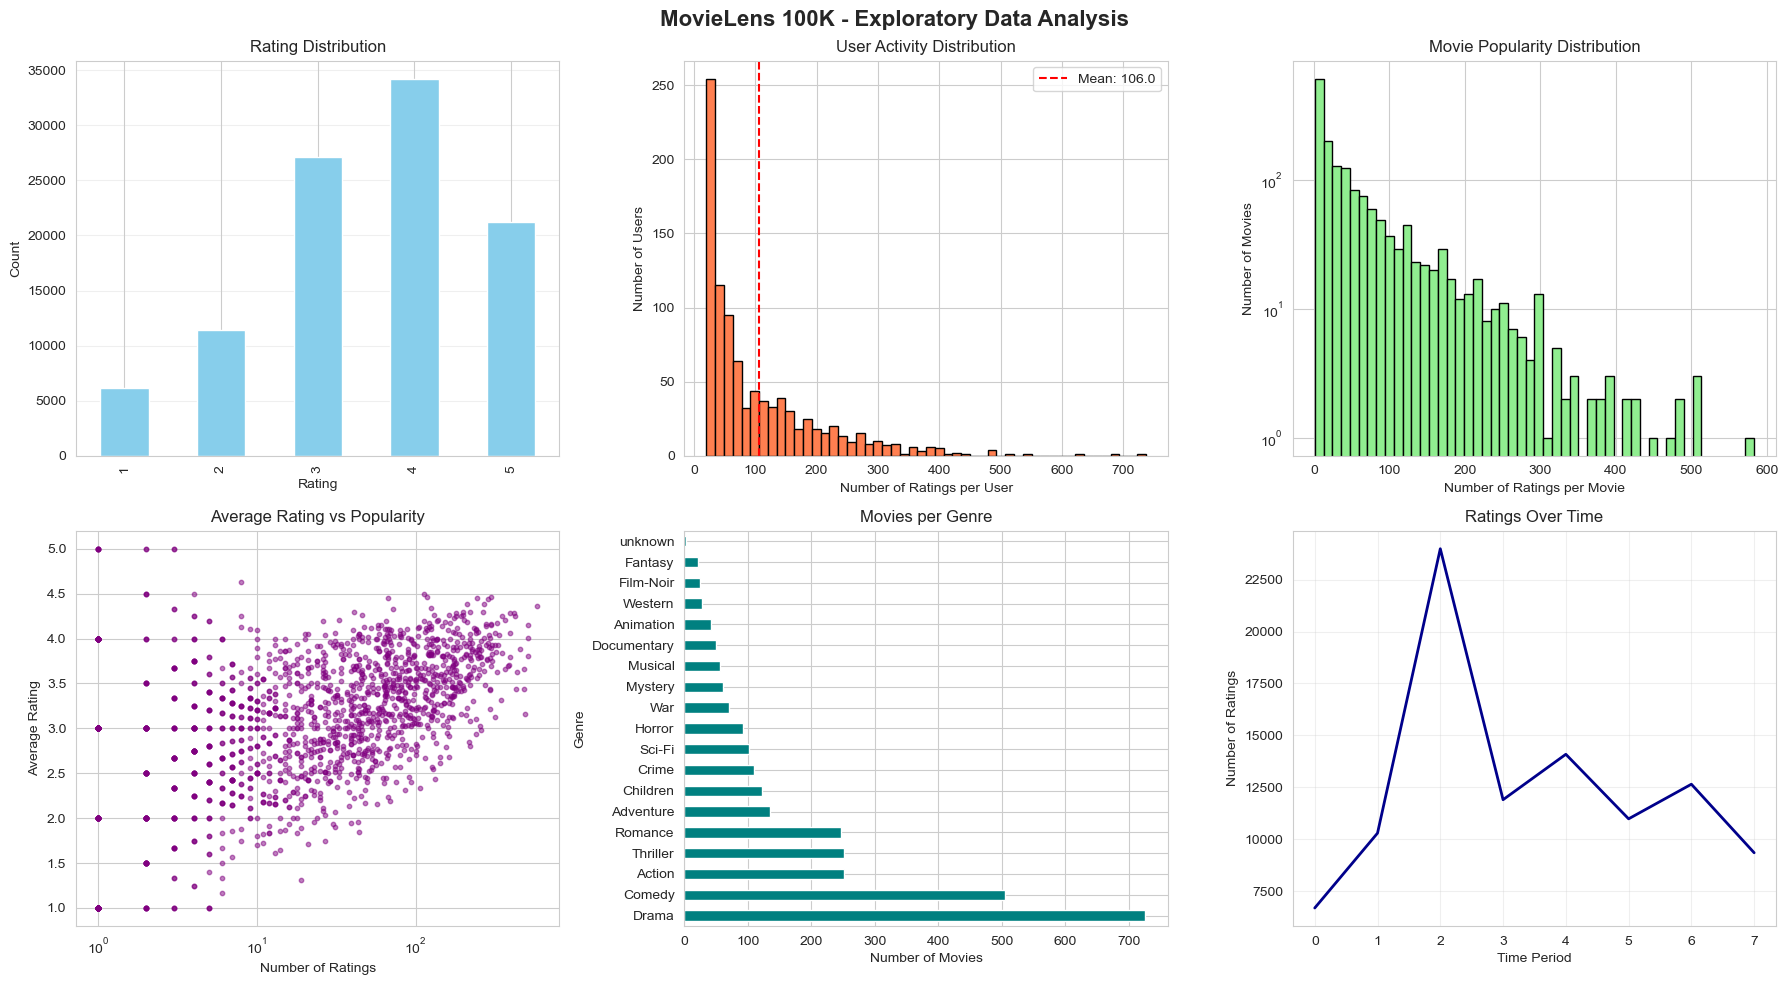

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('MovieLens 100K - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Plot 1: Rating Distribution
ratings['rating'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Rating Distribution')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: User Activity Distribution
user_activity.hist(bins=50, ax=axes[0, 1], color='coral', edgecolor='black')
axes[0, 1].set_title('User Activity Distribution')
axes[0, 1].set_xlabel('Number of Ratings per User')
axes[0, 1].set_ylabel('Number of Users')
axes[0, 1].axvline(user_activity.mean(), color='red', linestyle='--', label=f'Mean: {user_activity.mean():.1f}')
axes[0, 1].legend()

# Plot 3: Movie Popularity Distribution
movie_stats['rating_count'].hist(bins=50, ax=axes[0, 2], color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Movie Popularity Distribution')
axes[0, 2].set_xlabel('Number of Ratings per Movie')
axes[0, 2].set_ylabel('Number of Movies')
axes[0, 2].set_yscale('log')

# Plot 4: Average Rating vs Number of Ratings
axes[1, 0].scatter(movie_stats['rating_count'], movie_stats['avg_rating'], 
                   alpha=0.5, s=10, color='purple')
axes[1, 0].set_title('Average Rating vs Popularity')
axes[1, 0].set_xlabel('Number of Ratings')
axes[1, 0].set_ylabel('Average Rating')
axes[1, 0].set_xscale('log')

# Plot 5: Genre Distribution
genre_counts.plot(kind='barh', ax=axes[1, 1], color='teal')
axes[1, 1].set_title('Movies per Genre')
axes[1, 1].set_xlabel('Number of Movies')
axes[1, 1].set_ylabel('Genre')

# Plot 6: Ratings Over Time
monthly_ratings = ratings.groupby(['year', 'month']).size()
axes[1, 2].plot(range(len(monthly_ratings)), monthly_ratings.values, color='darkblue', linewidth=2)
axes[1, 2].set_title('Ratings Over Time')
axes[1, 2].set_xlabel('Time Period')
axes[1, 2].set_ylabel('Number of Ratings')
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('eda_visualization.png', dpi=300, bbox_inches='tight')
print("✓ Saved visualization to 'eda_visualization.png'")


### 9. Data Quality

In [10]:
print("\nRatings Data:")
print(f"  Missing values: {ratings.isnull().sum().sum()}")
print(f"  Duplicate rows: {ratings.duplicated().sum()}")
print(f"  Invalid ratings: {((ratings['rating'] < 1) | (ratings['rating'] > 5)).sum()}")

print("\nMovies Data:")
print(f"  Missing values in title: {movies['title'].isnull().sum()}")
print(f"  Duplicate movie IDs: {movies['movie_id'].duplicated().sum()}")


Ratings Data:
  Missing values: 0
  Duplicate rows: 0
  Invalid ratings: 0

Movies Data:
  Missing values in title: 0
  Duplicate movie IDs: 0


In [11]:
# Save processed data
ratings[['user_id', 'item_id', 'rating']].to_csv('data/processed/processed_ratings.csv', index=False)
movies.to_csv('data/processed/processed_movies.csv', index=False)

print("✓ Saved processed_ratings.csv")
print("✓ Saved processed_movies.csv")

print("\n" + "=" * 80)
print("EXPLORATION COMPLETE!")
print("=" * 80)
print("\nKey Insights:")
print(f"  • Dataset has {n_users:,} users and {n_items:,} movies")
print(f"  • Matrix is {sparsity*100:.2f}% sparse")
print(f"  • Average rating: {ratings['rating'].mean():.2f}/5.0")
print(f"  • Most users rate between {user_activity.quantile(0.25):.0f}-{user_activity.quantile(0.75):.0f} movies")
print(f"  • Most popular genre: {genre_counts.index[0]}")
print("\nReady for model training!")

✓ Saved processed_ratings.csv
✓ Saved processed_movies.csv

EXPLORATION COMPLETE!

Key Insights:
  • Dataset has 943 users and 1,682 movies
  • Matrix is 93.70% sparse
  • Average rating: 3.53/5.0
  • Most users rate between 33-148 movies
  • Most popular genre: Drama

Ready for model training!
